# Visualizing Sensor Data from Different Highways

In [ ]:
# External Package Imports
import geopandas as gpd
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from shapely.geometry import Point
import contextily as ctx
from PIL import Image
import mplleaflet
import folium

In [12]:
# get lat lng data
data = pd.read_csv('vds_info_w_lanes.csv')
data['Freeway'].value_counts()

i8 = data[data['Freeway'] == 'I8'][['vds_id', 'Lng', 'Lat']]
i805 = data[data['Freeway'] == 'I805'][['vds_id', 'Lng', 'Lat']]
i5 = data[data['Freeway'] == 'I5'][['vds_id', 'Lng', 'Lat']]

In [13]:
# Reading in the file for San Diego County boundary
sd = gpd.read_file('sd.geojson')

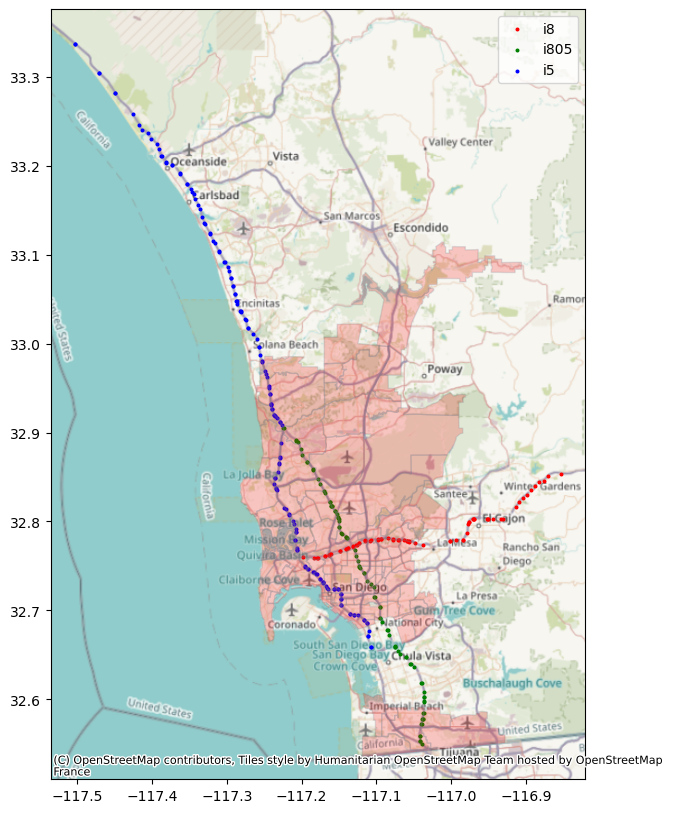

In [14]:
# Combine Lat and Lng columns to create a geometry column for i8 DataFrame
geometry_i8 = [Point(xy) for xy in zip(i8['Lng'], i8['Lat'])]
gdf_i8 = gpd.GeoDataFrame(i8, geometry=geometry_i8, crs='EPSG:4326')

# Combine Lat and Lng columns to create a geometry column for i805 DataFrame
geometry_i805 = [Point(xy) for xy in zip(i805['Lng'], i805['Lat'])]
gdf_i805 = gpd.GeoDataFrame(i805, geometry=geometry_i805, crs='EPSG:4326')

# Combine Lat and Lng columns to create a geometry column for i5 DataFrame
geometry_i5 = [Point(xy) for xy in zip(i5['Lng'], i5['Lat'])]
gdf_i5 = gpd.GeoDataFrame(i5, geometry=geometry_i5, crs='EPSG:4326')

# Plot San Diego County boundary
fig, ax = plt.subplots(figsize=(10, 10))

# Plot points for i8 on top of San Diego County map with red color
gdf_i8.plot(ax=ax, color='red', markersize=3.5, alpha=1, label='i8')

# Plot points for i805 on top of San Diego County map with green color
gdf_i805.plot(ax=ax, color='green', markersize=3.5, alpha=1, label='i805')

# Plot points for i5 on top of San Diego County map with blue color
gdf_i5.plot(ax=ax, color='blue', markersize=3.5, alpha=1, label='i5')

# Add basemap using contextily
ctx.add_basemap(ax, crs=gdf_i5.crs.to_string())

# Plot San Diego County boundary on top
sd.plot(ax=ax, color='red', edgecolor='slategray', alpha = .2)

# Show the legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
gdf_i8.explore()

In [ ]:
gdf_i805.explore()

In [ ]:
gdf_i5.explore()